# Wine Quality Prediction using different classification Model.

The aim of this project is to predict the quality of wine on
a scale of 0–10 given a set of features as inputs. The
dataset used is Wine Quality Data set from UCI Machine
Learning Repository. Input variables are fixed acidity,
volatile acidity, citric acid, residual sugar, chlorides, free
sulphur dioxide, total sulphur dioxide, density, pH,
sulphates, alcohol. And the output variable is quality
(score between 0 and 10).We are dealing only with red
wine. We have quality being one of these values: [3, 4, 5,
6, 7, 8]. The higher the value the better the quality. In this
project we will treat each class of the wine separately and
their aim is to be able and find decision boundaries that
work well for new unseen data. These are the classifiers. 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [5]:
ds = pd.read_csv('winequality-red.csv')
ds

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [6]:
ds.shape

(1599, 12)

#### Obsarvation:-
Dataset contain 12 variable and 1599 rows.


In [7]:
ds.dtypes


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#### Observation:-

All independent variable are float and dependent variable quality is integer.

In [9]:
pd.set_option('display.max_row',None)

### Check id data has any non numeric value which need to be converted into integer value

In [13]:
ds.applymap(lambda x: isinstance(x, str))

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
5             False             False        False           False      False   
6             False             False        False           False      False   
7             False             False        False           False      False   
8             False             False        False           False      False   
9             False             False        False           False      False   
10            False             False        False           False      False   
11            False             False        False           False      False   
12            False             False        False           False      False   
13            False             False        False           False      False   
14            False             False        False           False      False   
15            False             False        False           False      False   
16            False             False        False           False      False   
17            False             False        False           False      False   
18            False             False        False           False      False   
19            False             False        False           False      False   
20            False             False        False           False      False   
21            False             False        False           False      False   
22            False             False        False           False      False   
23            False             False        False           False      False   
24            False             False        False           False      False   
25            False             False        False           False      False   
26            False             False        False           False      False   
27            False             False        False           False      False   
28            False             False        False           False      False   
29            False             False        False           False      False   
30            False             False        False           False      False   
31            False             False        False           False      False   
32            False             False        False           False      False   
33            False             False        False           False      False   
34            False             False        False           False      False   
35            False             False        False           False      False   
36            False             False        False           False      False   
37            False             False        False           False      False   
38            False             False        False           False      False   
39            False             False        False           False      False   
40            False             False        False           False      False   
41            False             False        False           False      False   
42            False             False        False           False      False   
43            False             False        False           False      False   
44            False             False        False           False      False   
45            False             False        False           False      False   
46            False             False        False           False      False   
47            False             False        False           False      False   
48            False             False

#### Obsarvation:-

There is no non-numeric value exist in data set

In [14]:
ds.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097

#### Check if Data contain null values in row or columns.

In [67]:
ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Obsarvation:-
Null Value not present in dataset.

<AxesSubplot:>

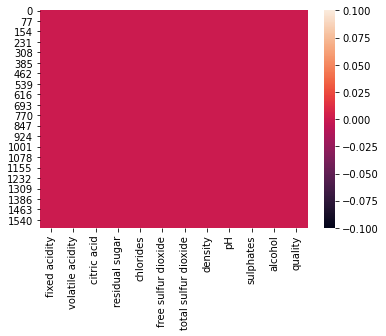

In [68]:
sns.heatmap(ds.isnull())

In [69]:
ds.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

#### Obsarvation:-
1. Count in all columns are same(1599), it indicate that there is no missing value in dataset.
2. Mean and Median value has less deference , indicate that there is some skewness but it is not very much.
3. there is not nagative value exist in dataset.
4. residual sugar, free sulfur dioxide, total sulfur dioxide have big difference in mean and Max value, indicating that outliers exist for these varilable.

In [15]:
corr_matrix = ds.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

## Obsarvation:- 
Correlation value for different variable with quality (target Variable) shows that residual sugar, free sulfur dioxide, pH values are very less correlated with its quality, we can remove these field but we are not going to delete them, we don't have very high number of columns in data set and processing them will not impact our result.

<AxesSubplot:>

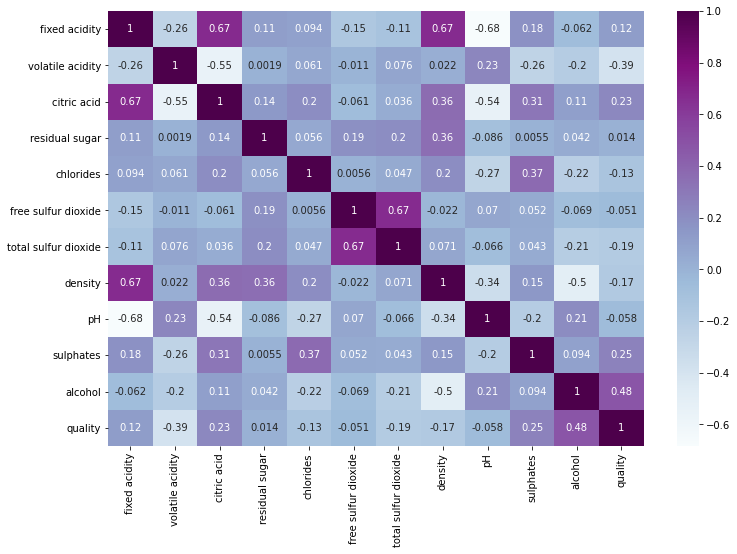

In [74]:
fig=plt.figure(figsize=(12,8))
hc=ds.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="BuPu")

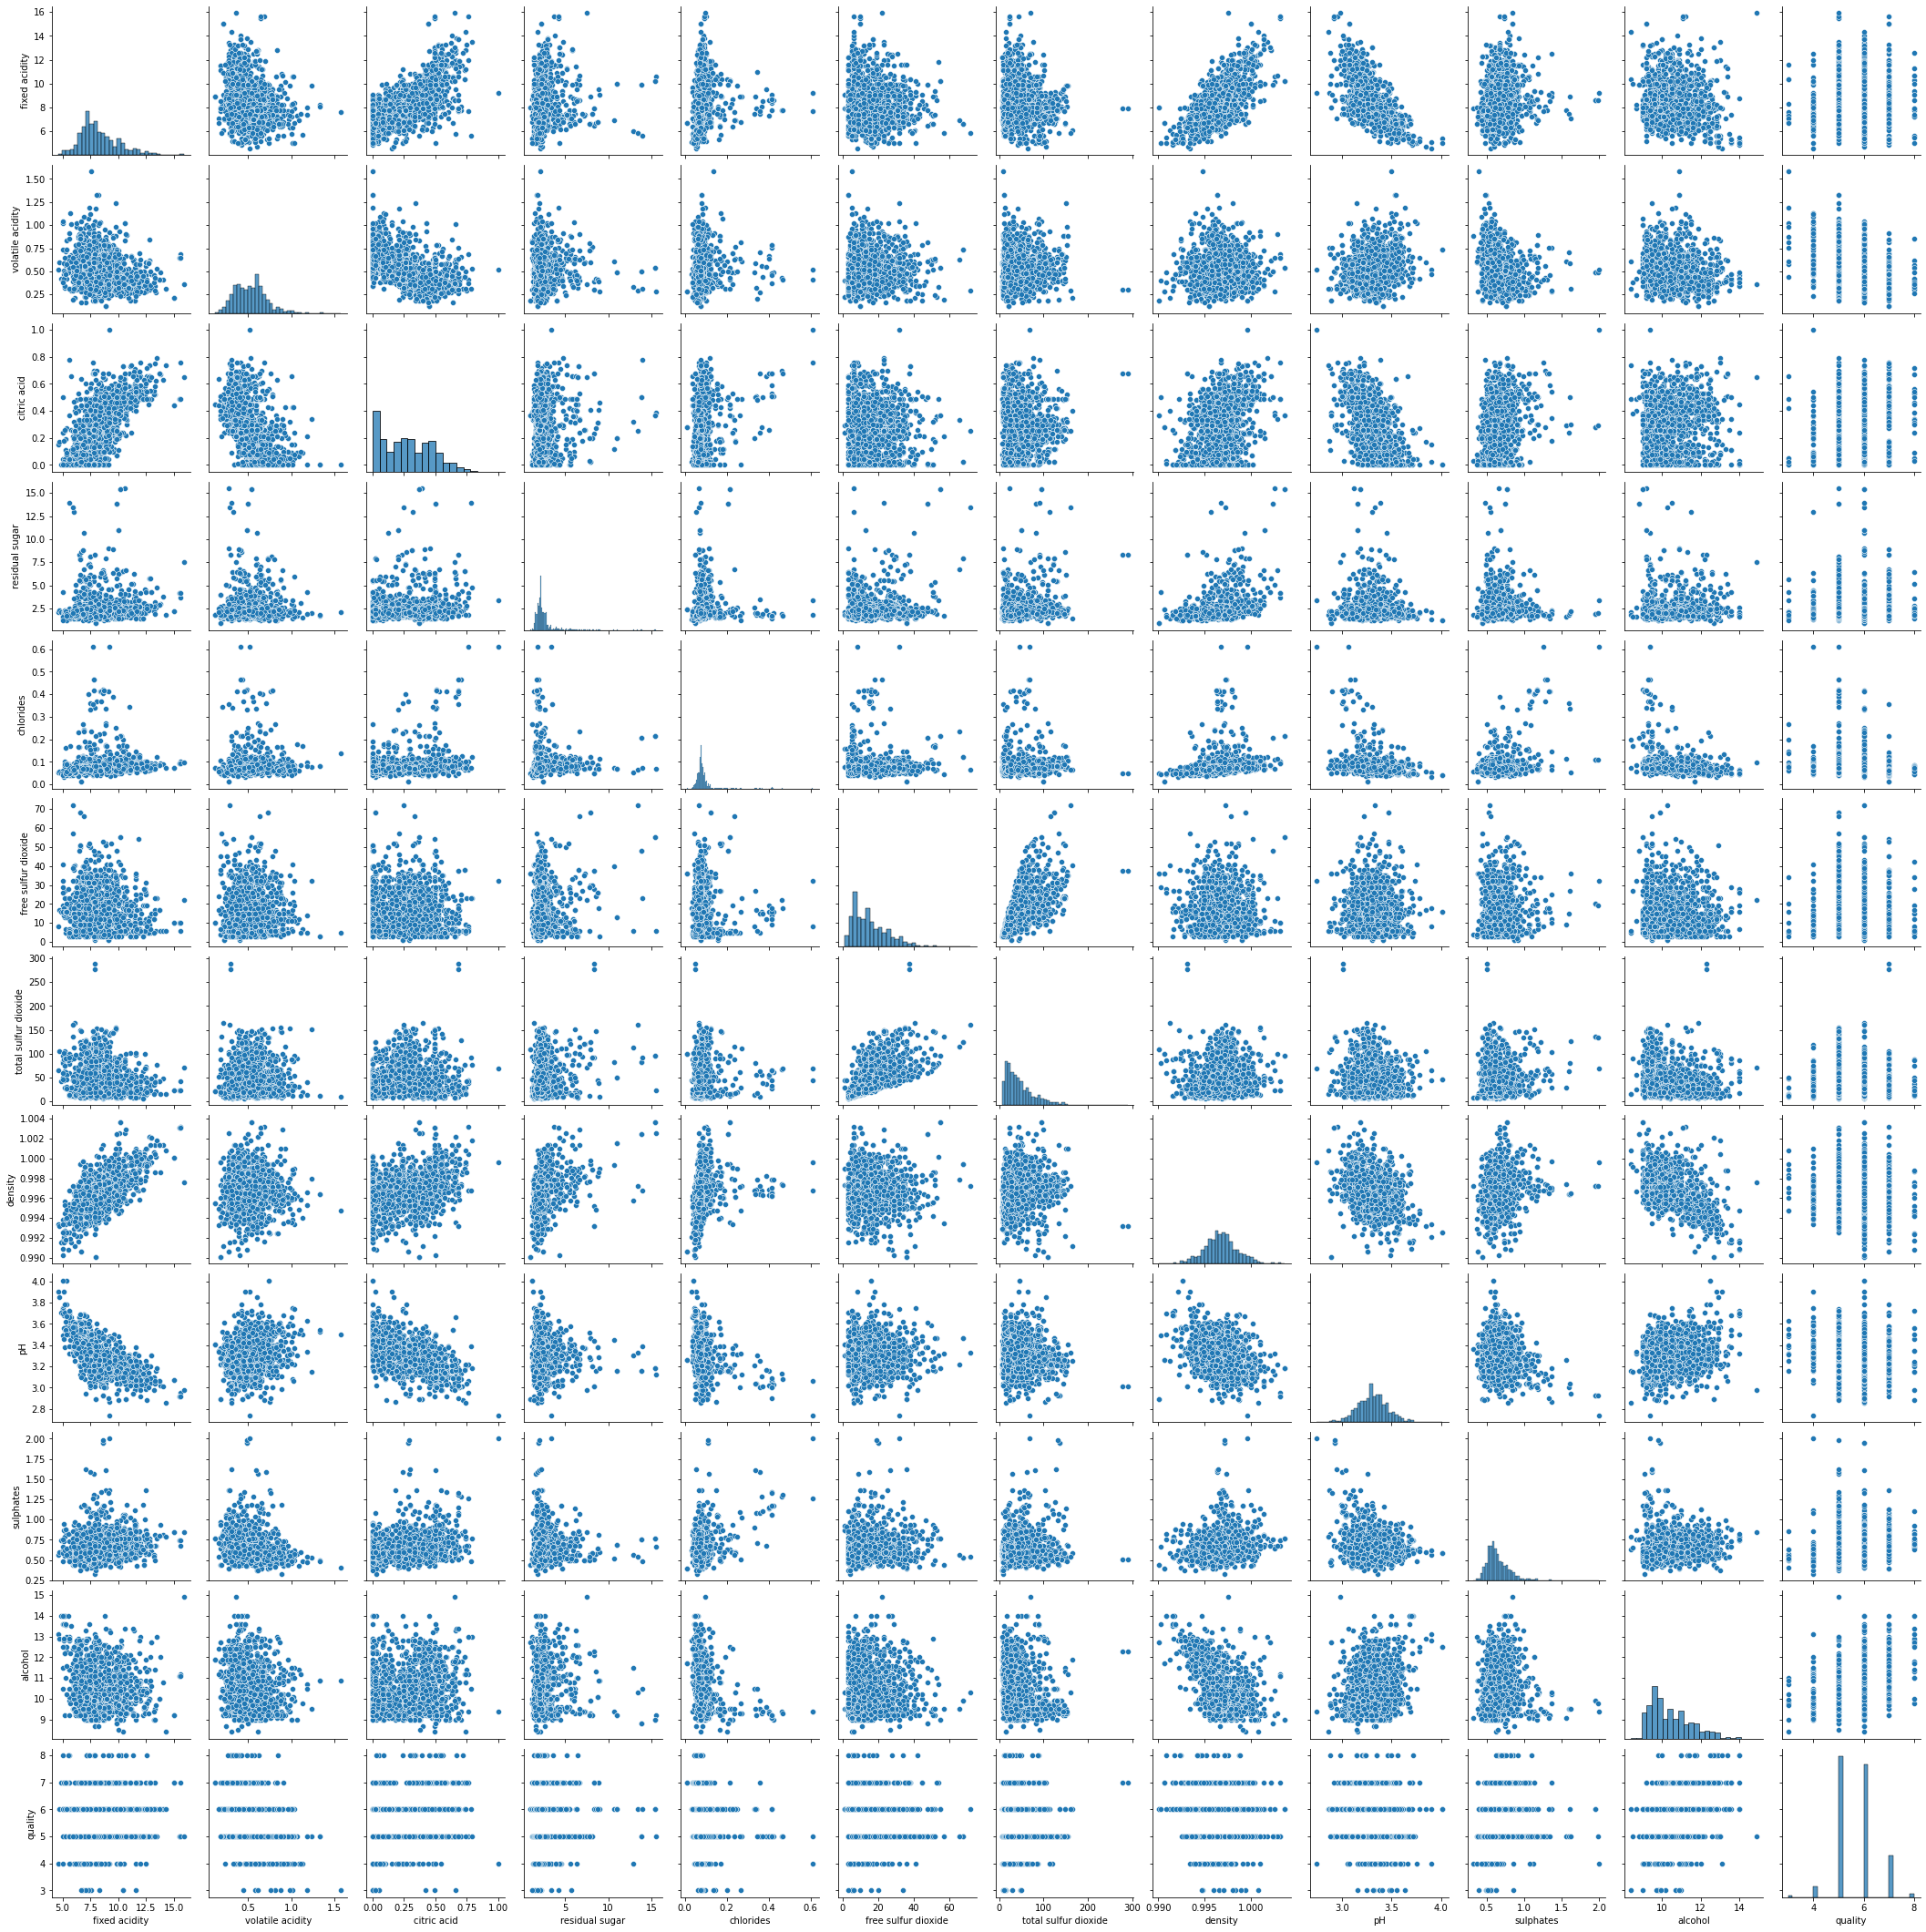

In [75]:
sns.pairplot(ds)

In [79]:
#ds_x = ds.drop(columns=['residual sugar', 'chlorides'])


<function matplotlib.pyplot.show(close=None, block=None)>

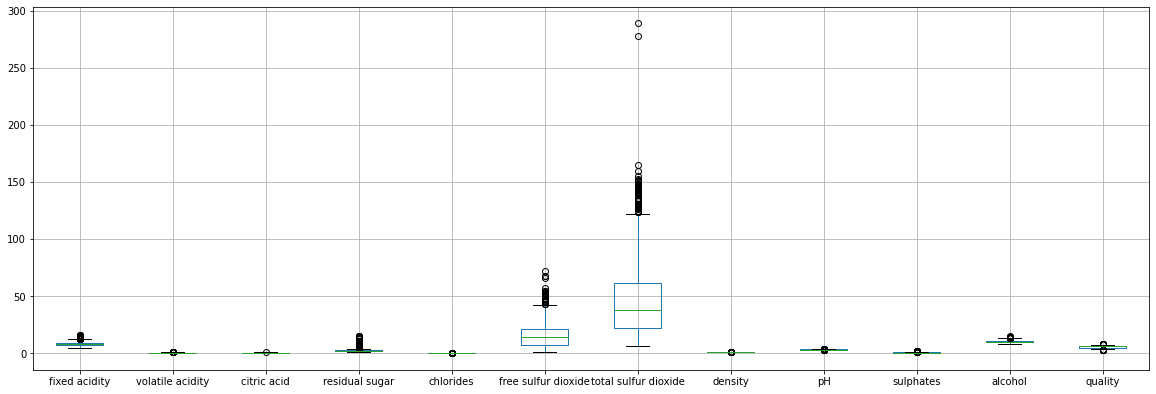

In [80]:
ds.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show

### Obsarvation:-
Outlier present in most of the columns but maximum outlier present in variable(residual sugar, free sulfur dioxide, total sulfur dioxide), will check individual column for outliers.

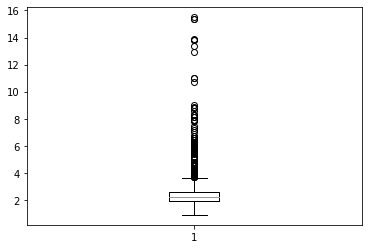

In [16]:
plt.boxplot(ds['residual sugar'])
plt.show()

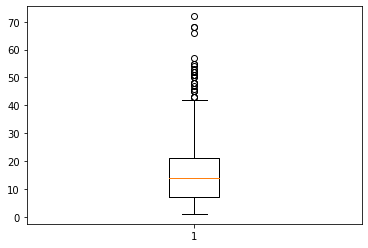

In [17]:
plt.boxplot(ds['free sulfur dioxide'])
plt.show()

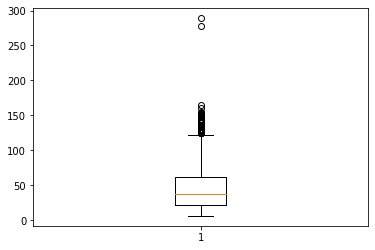

In [18]:
plt.boxplot(ds['total sulfur dioxide'])
plt.show()

#### Remove Outlier using IQR method

In [20]:
def outlier_IQR(data_frame, feature_name):
  IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
  lower_bridge = data_frame[feature_name].quantile(0.25) -(IQR*3)
  upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*3)
  return (lower_bridge,upper_bridge)

In [ ]:
l,u = outlier_IQR(ds, 'residual sugar')
ds.drop(ds[ (ds['residual sugar'] > u) | (ds['residual sugar'] < l) ].index, inplace=True)


In [22]:
l,u = outlier_IQR(ds, 'free sulfur dioxide')
ds.drop(ds[ (ds['free sulfur dioxide'] > u) | (ds['free sulfur dioxide'] < l) ].index, inplace=True)


In [23]:
l,u = outlier_IQR(ds, 'total sulfur dioxide')
ds.drop(ds[ (ds['total sulfur dioxide'] > u) | (ds['total sulfur dioxide'] < l) ].index, inplace=True)

In [24]:
#lets Print Outliers
print("Shape after removing outliers:" ,ds.shape)


Shape after removing outliers: (1511, 12)


In [25]:
print("Precentage of data loss after outlier removel")
print(((1599-1511)/1599)*100)

Precentage of data loss after outlier removel
5.5034396497811136


#### Obsarvation:- 5.5% data loss after outlier removel

In [26]:
ds.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

#### Divide wine quality in Good and Bad, any value less the 6.5 indicate that wine is not good, any value more then 6.5 wll indicate that wine is good quality

In [28]:
bins = (0, 6.5, 10)
group_names = ['bad', 'good']
ds['quality'] = pd.cut(ds['quality'], bins = bins, labels = group_names)


In [29]:
ds.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  
3      9.8     bad  
4      9.4     bad

In [31]:
ds['quality'].value_counts()

bad     1315
good     196
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

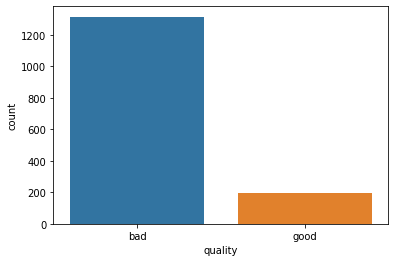

In [32]:
sns.countplot(ds['quality'])

### Above Count plot show that data is imbalance,

#### Encode string to 0,1 numerical format so that model can process this value.

In [34]:
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()
ds['quality'] = label_quality.fit_transform(ds['quality'])
ds['quality'].value_counts()

0    1315
1     196
Name: quality, dtype: int64

In [35]:
ds.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        0  
4      9.4        0

In [36]:
ds_x = ds.drop(columns=['quality'])
ds_y = ds[['quality']]

In [37]:
ds_x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
10              6.7             0.580         0.08            1.80      0.097   
12              5.6             0.615         0.00            1.60      0.089   
13              7.8             0.610         0.29            1.60      0.114   
14              8.9             0.620         0.18            3.80      0.176   
15              8.9             0.620         0.19            3.90      0.170   
16              8.5             0.280         0.56            1.80      0.092   
17              8.1             0.560         0.28            1.70      0.368   
18              7.4             0.590         0.08            4.40      0.086   
19              7.9             0.320         0.51            1.80      0.341   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
27              7.9             0.430         0.21            1.60      0.106   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
30              6.7             0.675         0.07            2.40      0.089   
31              6.9             0.685         0.00            2.50      0.105   
32              8.3             0.655         0.12            2.30      0.083   
34              5.2             0.320         0.25            1.80      0.103   
36              7.8             0.600         0.14            2.40      0.086   
37              8.1             0.380         0.28            2.10      0.066   
38              5.7             1.130         0.09            1.50      0.172   
41              8.8             0.610         0.30            2.80      0.088   
42              7.5             0.490         0.20            2.60      0.332   
43              8.1             0.660         0.22            2.20      0.069   
44              6.8             0.670         0.02            1.80      0.050   
45              4.6             0.520         0.15            2.10      0.054   
46              7.7             0.935         0.43            2.20      0.114   
47              8.7             0.290         0.52            1.60      0.113   
48              6.4             0.400         0.23            1.60      0.066   
49              5.6             0.310         0.37            1.40      0.074   
50              8.8             0.660         0.26            1.70      0.074   
51              6.6             0.520         0.04            2.20      0.069   
52              6.6             0.500         0.04            2.10      0.068   
53              8.6             0.380         0.36            3.00      0.081   
54              7.6             0.510

In [39]:
ds_y

y = ds_y

In [40]:
y.dtypes

quality    int32
dtype: object

In [42]:
ds_x.skew()

fixed acidity           0.958061
volatile acidity        0.687306
citric acid             0.311769
residual sugar          1.454747
chlorides               5.765074
free sulfur dioxide     1.040049
total sulfur dioxide    1.237028
density                -0.072602
pH                      0.194241
sulphates               2.477748
alcohol                 0.855910
dtype: float64

In [43]:
for i in ds_x.columns:
    if ds_x[i].skew() > 0.55:
        ds_x[i]=np.cbrt(ds_x[i])
    if ds_x[i].skew() < -0.55:
        ds_x[i]=np.cbrt(ds_x[i])    

ds_x.skew()    

fixed acidity           0.564844
volatile acidity       -0.071892
citric acid             0.311769
residual sugar          0.837893
chlorides               3.147784
free sulfur dioxide     0.183468
total sulfur dioxide    0.356429
density                -0.072602
pH                      0.194241
sulphates               1.356974
alcohol                 0.727085
dtype: float64

#### Observation:-three columns still has skewness.
chlorides               
sulphates               
alcohol                 

In [213]:
#ds_x = ds_x.drop(columns=['residual sugar', 'chlorides'])

<AxesSubplot:xlabel='chlorides', ylabel='Count'>

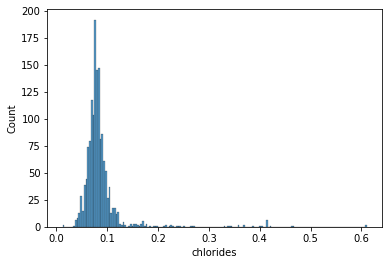

In [44]:
sns.histplot(ds_x['chlorides'])

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

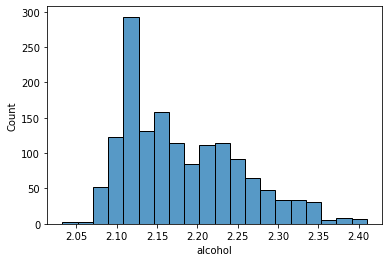

In [48]:
sns.histplot(ds_x['alcohol'])

<AxesSubplot:xlabel='sulphates', ylabel='Count'>

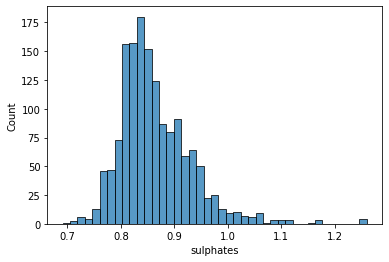

In [49]:
sns.histplot(ds_x['sulphates'])

#### Applying power transformation to remove remaining skewness

In [52]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(ds_x)
x = pd.DataFrame(data_trans, columns = x.columns)

In [53]:
x.skew()

fixed acidity           0.000580
volatile acidity        0.002054
citric acid             0.018969
residual sugar         -0.037135
chlorides              -0.642669
free sulfur dioxide    -0.012464
total sulfur dioxide    0.001210
density                 0.004910
pH                     -0.002785
sulphates              -0.024811
alcohol                 0.116534
dtype: float64

#### Skewness removed for most of the columns

In [54]:
x.shape

(1511, 11)

In [55]:
y.shape

(1511, 1)

In [56]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.35,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc >maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu, "on Random_state",maxRS)

Best accuracy is 0.9168241965973535 on Random_state 145


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.35,random_state=145)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(982, 11)
(529, 11)
(982, 1)
(529, 1)


In [186]:
y_train.dtypes

quality    int32
dtype: object

#### Handling imbalance data using Oversampling

In [59]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train['quality'] == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train['quality'] == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.values.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 135
Before OverSampling, counts of label '0': 847 

After OverSampling, the shape of train_X: (1694, 11)
After OverSampling, the shape of train_y: (1694,) 

After OverSampling, counts of label '1': 847
After OverSampling, counts of label '0': 847


In [60]:
x = x_train_res
y = y_train_res

### Test Train Split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.35,random_state=145)

#### Fit data test and train data to predict values using different method

In [69]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8414839797639123
[[241  55]
 [ 39 258]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       296
           1       0.82      0.87      0.85       297

    accuracy                           0.84       593
   macro avg       0.84      0.84      0.84       593
weighted avg       0.84      0.84      0.84       593



In [70]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
pred = gnb.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.7993254637436762
[[231  65]
 [ 54 243]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       296
           1       0.79      0.82      0.80       297

    accuracy                           0.80       593
   macro avg       0.80      0.80      0.80       593
weighted avg       0.80      0.80      0.80       593



In [71]:
sv = SVC()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8802698145025295
[[257  39]
 [ 32 265]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       296
           1       0.87      0.89      0.88       297

    accuracy                           0.88       593
   macro avg       0.88      0.88      0.88       593
weighted avg       0.88      0.88      0.88       593



In [1]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

NameError: name 'RandomForestClassifier' is not defined

In [73]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8785834738617201
[[246  50]
 [ 22 275]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       296
           1       0.85      0.93      0.88       297

    accuracy                           0.88       593
   macro avg       0.88      0.88      0.88       593
weighted avg       0.88      0.88      0.88       593



In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8819561551433389
[[227  69]
 [  1 296]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87       296
           1       0.81      1.00      0.89       297

    accuracy                           0.88       593
   macro avg       0.90      0.88      0.88       593
weighted avg       0.90      0.88      0.88       593



In [75]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))   
print(classification_report(y_test,preddt))

0.8566610455311973
[[250  46]
 [ 39 258]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       296
           1       0.85      0.87      0.86       297

    accuracy                           0.86       593
   macro avg       0.86      0.86      0.86       593
weighted avg       0.86      0.86      0.86       593



# Cross Validation of predicted and actual value

In [231]:
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())

[0.82822086 0.82515337 0.83742331 0.84662577 0.84355828]
0.836196319018405


In [78]:
score=cross_val_score(gnb,x,y,cv=5)
#print(score)
print(score.mean())

0.8052050060218882


In [77]:
score=cross_val_score(sv,x,y,cv=5)
#print(score)
print(score.mean())

0.8890139812536001


In [79]:
score=cross_val_score(rf,x,y,cv=5)
#print(score)
print(score.mean())

0.9451117976645547


In [80]:
score=cross_val_score(knn,x,y,cv=5)
#print(score)
print(score.mean())

0.8837007557906128


In [81]:
score=cross_val_score(ad,x,y,cv=5)
#print(score)
print(score.mean())

0.885488122043602


In [82]:
score=cross_val_score(dt,x,y,cv=5)
#print(score)
print(score.mean())

0.8966940706219126


# AUC ROC Curve for all model.

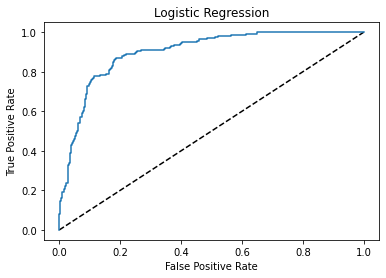

In [84]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

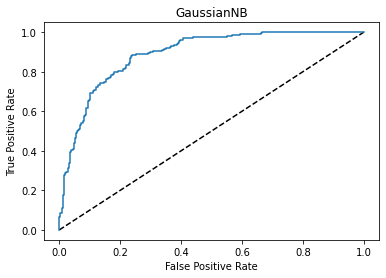

In [85]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

y_pred_prob=gnb.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("GaussianNB")
plt.show()

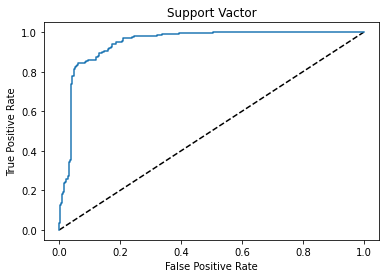

In [86]:
sv = SVC()
sv.probability = True
sv.fit(x_train,y_train)
y_pred_prob=sv.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Support Vactor")
plt.show()


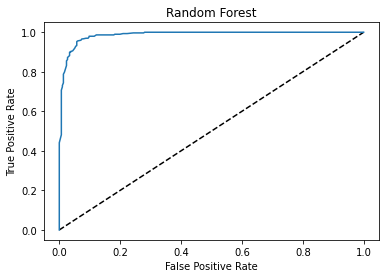

In [87]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest")
plt.show()

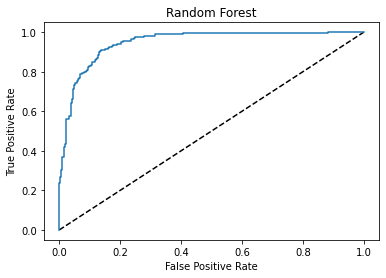

In [88]:
y_pred_prob=ad.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest")
plt.show()

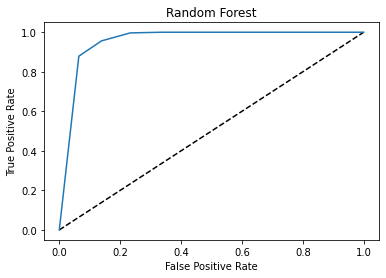

In [89]:
y_pred_prob=knn.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest")
plt.show()

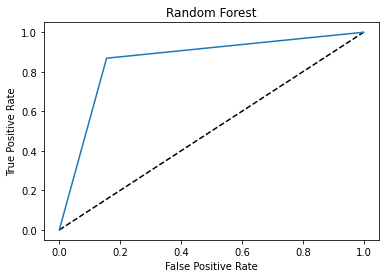

In [90]:
y_pred_prob=dt.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest")
plt.show()

## Obsarvation:-
AUC ROC curve for Random forest is best showing higest area covered.

# Maximum Accurecy coming for Random Forest Classifier model., we will do hyper perameter tuning for all model to check if any model gives more accurecy


In [91]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor

## Hyper parameter tuning for Random Forest Classification.

In [92]:
#Apply Random SearchCV for Random Forest Model
parameters = {"n_estimators":[100,200,300,400,500,600,700,800], 'criterion' : ['gini', 'entropy'],
              "max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18]
            ,"max_features":['auto', 'sqrt'],"min_samples_leaf":[1,3,5,6,7] }
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.35,random_state=67)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = parameters, n_iter = 100, cv = 8, verbose=2, n_jobs = -1)
# Fit the random search model

result=rf_random.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 8 folds for each of 100 candidates, totalling 800 fits
Best Score: 0.9245940442187666
Best Hyperparameters: {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 25, 'criterion': 'gini'}


## Tuning for Support vactor machine classifier

In [93]:
#Apply Random SearchCV for SVC Model
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.35,random_state=67)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = SVC()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = parameters, n_iter = 50, cv = 8, verbose=2, n_jobs = -1)
# Fit the random search model

result=rf_random.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 8 folds for each of 36 candidates, totalling 288 fits
Best Score: 0.9718078916746007
Best Hyperparameters: {'gamma': 1, 'C': 10}


# Tuning for Decision Tree Classifier

In [94]:
#Apply Random SearchCV for DTC  Model
parameters= {'max_depth': np.arange(2,15),'criterion':['gini', 'entropy'] }

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.35,random_state=67)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf =  DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = parameters, n_iter = 50, cv = 8, verbose=2, n_jobs = -1)
# Fit the random search model

result=rf_random.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 8 folds for each of 26 candidates, totalling 208 fits
Best Score: 0.8810232201417538
Best Hyperparameters: {'max_depth': 14, 'criterion': 'gini'}


# Tuning for KNeighborsClassifier

In [95]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

parameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
knn = KNeighborsClassifier()
rf_random = RandomizedSearchCV(estimator = knn, param_distributions = parameters, n_iter = 50, cv = 8, verbose=2, n_jobs = -1)
# Fit the random search model

result=rf_random.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 8 folds for each of 50 candidates, totalling 400 fits
Best Score: 0.9255395112662647
Best Hyperparameters: {'p': 1, 'n_neighbors': 1, 'leaf_size': 48}


# Tuning for Gaussian Naive Bayes Classifier

In [96]:
parameters = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}

rf_random = RandomizedSearchCV(estimator = gnb, param_distributions = parameters, n_iter = 50, cv = 8, verbose=2, n_jobs = -1)
# Fit the random search model

result=rf_random.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 8 folds for each of 14 candidates, totalling 112 fits
Best Score: 0.8147281286364118
Best Hyperparameters: {'var_smoothing': 0.01}


In [97]:
parameters = {
    'n_estimators' : [100,200], 
    'learning_rate' : [0.001,0.01,0.1,0.2,0.5]
}

rf_random = RandomizedSearchCV(estimator = ad, param_distributions = parameters, n_iter = 50, cv = 8, verbose=2, n_jobs = -1)
# Fit the random search model

result=rf_random.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 8 folds for each of 10 candidates, totalling 80 fits
Best Score: 0.8818827356394796
Best Hyperparameters: {'n_estimators': 200, 'learning_rate': 0.5}


# Highest Accurecy coming for SVC after hyper parameter tuning. 
Accuracy score for SVC 0.9718078916746007

Best Hyperparameters: {'gamma': 1, 'C': 10}

# Saving Best Model

In [100]:
import joblib 
joblib.dump(sv,'winequality-Support-Vactor-Model.pki')

['winequality-Support-Vactor-Model.pki']

In [101]:
model = joblib.load('winequality-Support-Vactor-Model.pki')

In [103]:
prediction = model.predict(x_test)

In [104]:
prediction = pd.DataFrame(prediction)  #Converting into Data Frame

In [105]:
prediction.to_csv('Result.csv')